In [1]:
# importing pandas package
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# making data frame from csv file
df = pd.read_csv(r"/content/Sales_add.csv")
df.head()

,Month,Region,Manager,Sales_before_digital_add(in $),Sales_After_digital_add(in $)
0,Month-1,Region - A,Manager - A,132921,270390
1,Month-2,Region - A,Manager - C,149559,223334
2,Month-3,Region - B,Manager - A,146278,244243
3,Month-4,Region - B,Manager - B,152167,231808
4,Month-5,Region - C,Manager - B,159525,258402


In [3]:
df.shape

(22, 5)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22 entries, 0 to 21
Data columns (total 5 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Month                           22 non-null     object
 1   Region                          22 non-null     object
 2   Manager                         22 non-null     object
 3   Sales_before_digital_add(in $)  22 non-null     int64 
 4   Sales_After_digital_add(in $)   22 non-null     int64 
dtypes: int64(2), object(3)
memory usage: 1008.0+ bytes


In [5]:
df.nunique()

Month                             22
Region                             3
Manager                            3
Sales_before_digital_add(in $)    22
Sales_After_digital_add(in $)     22
dtype: int64

In [6]:
df.isnull().sum()

Month                             0
Region                            0
Manager                           0
Sales_before_digital_add(in $)    0
Sales_After_digital_add(in $)     0
dtype: int64

In [7]:
#1
from scipy .stats import ttest_ind
sales_before = df['Sales_before_digital_add(in $)']
sales_after = df['Sales_After_digital_add(in $)']
t_stat, p_val = ttest_ind(sales_before, sales_after)

In [8]:
p_val

2.614368006904645e-16

In [9]:
if p_val < 0.05:
    print("Null Hypothesis gets Rejected")
else:
    print("Null Hypothesis gets Accepted")

Null Hypothesis gets Rejected


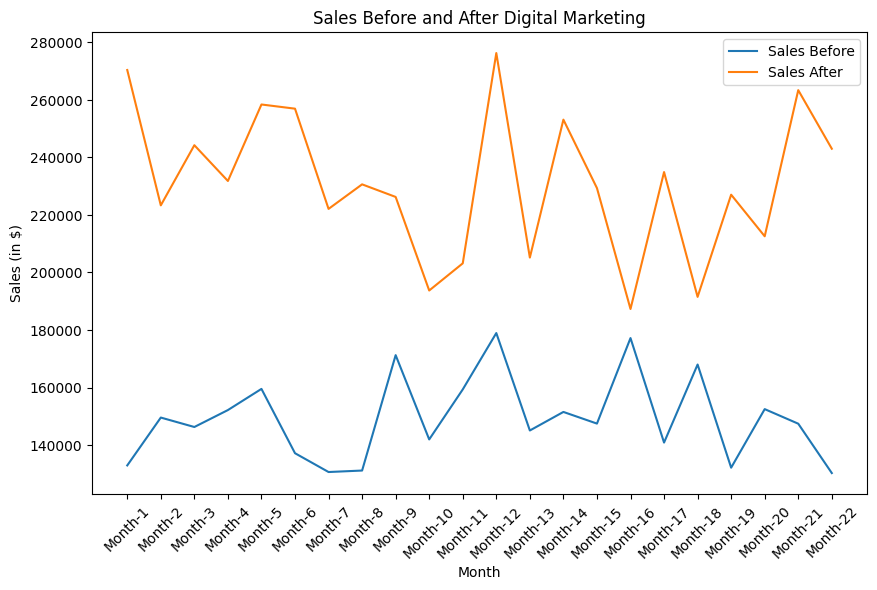

In [10]:
plt.subplots(figsize=(10, 6))
plt.plot(df['Month'], sales_before, label='Sales Before')
plt.plot(df['Month'], sales_after, label='Sales After')
plt.xlabel('Month')
plt.ylabel('Sales (in $)')
plt.title('Sales Before and After Digital Marketing')
plt.legend()
plt.xticks(rotation=45)
plt.show()

Here, increase in sales after stepping into digital marketing

In [11]:
#2
from scipy.stats import chi2_contingency
contingency_table = pd.crosstab(df['Region'], df['Manager'])
chi2_stat, p_val1, df, exp = chi2_contingency(contingency_table)
chi2_stat

3.050566893424036

In [12]:
p_val1

0.5493991051158094

In [13]:
if p_val < 0.05:
    print("Null Hypothesis Rejected")
else:
    print("Null Hypothesis Accepted")

Null Hypothesis Rejected


So the low p-value suggest the evidence of dependency